# Steps to Wrangle the Auser Data
- read csv file to df
- summarize raw data
    - how many nulls?
    - distributions of features
    - data types
- prepare data
    - remove or impute nulls
    - change innapropriate data types
- create reproducible .py file

### The deliverable of this notebook are functions to put in a Aquifer_Wrangle.py file

In [3]:
#initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Aquifer_Auser.csv', index_col=0)

In [5]:
print('The dataframe has', df.shape[1], 'columns and', df.shape[0], 'rows with a datetime index.')

The dataframe has 26 columns and 8154 rows with a datetime index.


In [6]:
df

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
Date,,,,,,,,,,,,,,,,,,,,,
05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03


### First glance shows several null values in the dataset. Maybe the information became available in later years.

In [7]:
print('Columns in the Auser df:')
df.columns.to_list()

Columns in the Auser df:


['Rainfall_Gallicano',
 'Rainfall_Pontetetto',
 'Rainfall_Monte_Serra',
 'Rainfall_Orentano',
 'Rainfall_Borgo_a_Mozzano',
 'Rainfall_Piaggione',
 'Rainfall_Calavorno',
 'Rainfall_Croce_Arcana',
 'Rainfall_Tereglio_Coreglia_Antelminelli',
 'Rainfall_Fabbriche_di_Vallico',
 'Depth_to_Groundwater_LT2',
 'Depth_to_Groundwater_SAL',
 'Depth_to_Groundwater_PAG',
 'Depth_to_Groundwater_CoS',
 'Depth_to_Groundwater_DIEC',
 'Temperature_Orentano',
 'Temperature_Monte_Serra',
 'Temperature_Ponte_a_Moriano',
 'Temperature_Lucca_Orto_Botanico',
 'Volume_POL',
 'Volume_CC1',
 'Volume_CC2',
 'Volume_CSA',
 'Volume_CSAL',
 'Hydrometry_Monte_S_Quirico',
 'Hydrometry_Piaggione']

In [8]:
df.describe()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
count,5295.000000,5295.000000,5289.000000,5295.000000,5295.000000,4930.000000,5295.000000,5295.000000,5295.000000,5295.000000,...,8154.000000,8154.000000,8154.000000,5660.000000,5660.000000,5660.000000,5660.000000,5660.000000,7241.000000,6119.000000
mean,4.948782,3.495449,3.919077,3.150670,4.578961,3.953976,4.578886,2.849745,4.182927,5.922304,...,11.202079,10.971358,15.501134,-9316.138433,-16301.825866,-11808.085531,-2352.562424,-1985.775034,0.313618,-0.209204
std,14.366480,9.983772,10.815270,8.747507,12.771166,10.888103,12.461918,9.239679,11.135511,16.281733,...,6.903190,8.708626,7.138789,2224.435459,1490.096594,1444.085240,2854.176875,2534.301154,0.213851,0.849013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.850000,-2.850000,-3.300000,-13883.225810,-18601.920000,-14438.304000,-7757.258065,-9497.774194,0.000000,-1.190000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.650000,0.000000,9.750000,-11004.654450,-17081.280000,-12769.920000,-5493.709677,-4354.392857,0.160000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,10.875000,15.400000,-9728.571429,-16450.560000,-12078.720000,0.000000,0.000000,0.260000,-0.280000
75%,2.000000,1.000000,1.600000,1.000000,2.000000,1.400000,2.000000,1.400000,2.000000,3.000000,...,16.700000,18.550000,21.600000,-7323.783871,-15785.280000,-11015.136000,0.000000,0.000000,0.400000,0.580000
max,318.800000,146.600000,152.200000,108.800000,176.600000,140.800000,209.000000,285.000000,147.200000,197.000000,...,29.500000,30.750000,31.050000,-4114.670400,-7149.791935,-5569.298387,0.000000,0.000000,2.170000,3.690000


### Most rainfall is 0, 0 being the first and second quartiles for all rainfll categories.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8154 entries, 05/03/1998 to 30/06/2020
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rainfall_Gallicano                       5295 non-null   float64
 1   Rainfall_Pontetetto                      5295 non-null   float64
 2   Rainfall_Monte_Serra                     5289 non-null   float64
 3   Rainfall_Orentano                        5295 non-null   float64
 4   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 5   Rainfall_Piaggione                       4930 non-null   float64
 6   Rainfall_Calavorno                       5295 non-null   float64
 7   Rainfall_Croce_Arcana                    5295 non-null   float64
 8   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 9   Rainfall_Fabbriche_di_Vallico            5295 non-null   float64
 10  Depth_to_Groundwater_LT2              

### All features are decimal values. No columns have less than 3,000 non-null values. There are ~8,100 rows in the df.  
## What is the percentage of nulls by column?

In [10]:
null_counts = pd.DataFrame(df.isnull().sum(), columns=['null_count'])

In [11]:
null_counts['percent'] = round((null_counts.null_count / df.shape[0] * 100),1)

In [12]:
null_counts

,null_count,percent
Rainfall_Gallicano,2859,35.1
Rainfall_Pontetetto,2859,35.1
Rainfall_Monte_Serra,2865,35.1
Rainfall_Orentano,2859,35.1
Rainfall_Borgo_a_Mozzano,2859,35.1
Rainfall_Piaggione,3224,39.5
Rainfall_Calavorno,2859,35.1
Rainfall_Croce_Arcana,2859,35.1
Rainfall_Tereglio_Coreglia_Antelminelli,2859,35.1
Rainfall_Fabbriche_di_Vallico,2859,35.1


# What is the percentage of nulls by row (date)?

# Distribution of Features

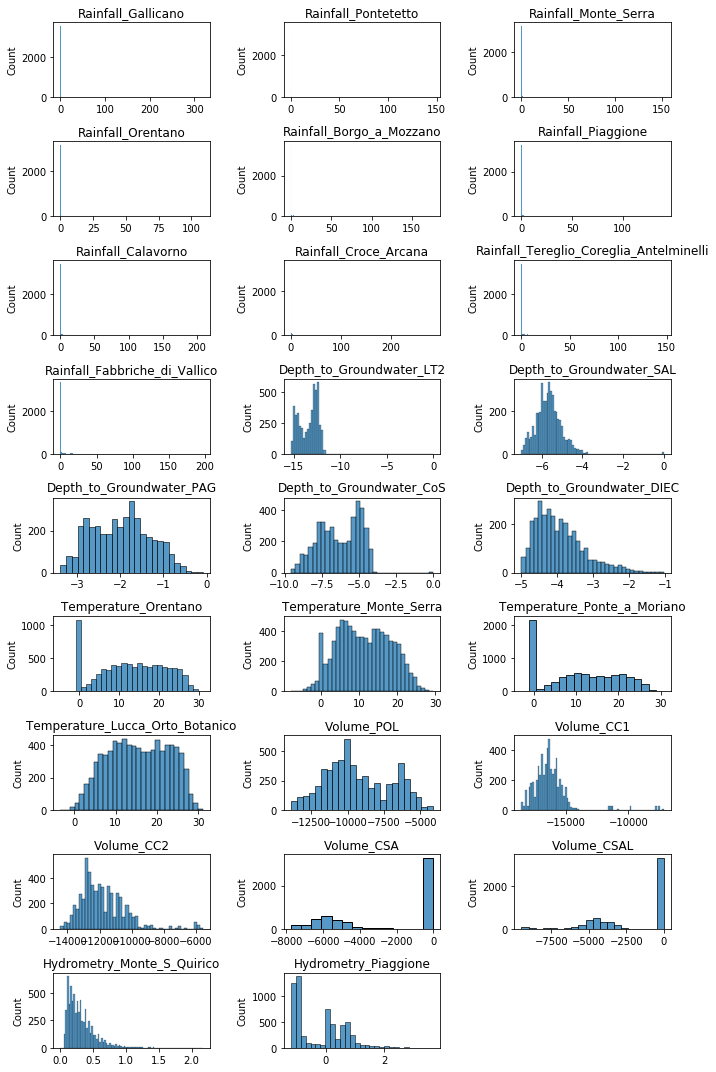

In [15]:
count = 1
plt.figure(figsize=(10,15))

for x in df.columns:
    
    plt.subplot(9,3,count)
    sns.histplot(df[x])
    plt.title(x)
    plt.xlabel('')
    count += 1
    
plt.tight_layout()

In [17]:
df.dtypes

Rainfall_Gallicano                         float64
Rainfall_Pontetetto                        float64
Rainfall_Monte_Serra                       float64
Rainfall_Orentano                          float64
Rainfall_Borgo_a_Mozzano                   float64
Rainfall_Piaggione                         float64
Rainfall_Calavorno                         float64
Rainfall_Croce_Arcana                      float64
Rainfall_Tereglio_Coreglia_Antelminelli    float64
Rainfall_Fabbriche_di_Vallico              float64
Depth_to_Groundwater_LT2                   float64
Depth_to_Groundwater_SAL                   float64
Depth_to_Groundwater_PAG                   float64
Depth_to_Groundwater_CoS                   float64
Depth_to_Groundwater_DIEC                  float64
Temperature_Orentano                       float64
Temperature_Monte_Serra                    float64
Temperature_Ponte_a_Moriano                float64
Temperature_Lucca_Orto_Botanico            float64
Volume_POL                     